In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv', sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [2]:
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In [3]:
idx = np.logical_or(np.logical_and(df['year'].values == 2014, df['month'].values < 3),
                    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop(['pm2.5','No','year','Is','Ir'], axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,month,day,hour,DEWP,TEMP,PRES,Iws
34320,12,1,0,-13,-2.0,1026.0,0.89
34321,12,1,1,-14,-3.0,1025.0,3.13
34322,12,1,2,-13,-3.0,1025.0,0.89
34323,12,1,3,-13,-4.0,1025.0,0.89
34324,12,1,4,-13,-3.0,1025.0,1.78


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

[Polynomial Regression: Degree = 4]
MSE train: 2502.52, test: 3538.39
R^2 train: 0.84, test: 0.77


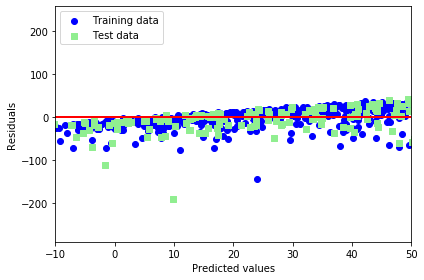

In [5]:
# polynomial regressor
X_lin = X['DEWP'].values[:, np.newaxis]

regr = LinearRegression()

# Create quadratic features
degree4 = PolynomialFeatures(degree=4)
X_degree4 = degree4.fit_transform(X_lin)

# fit features
degree4_regr = LinearRegression()
degree4_regr.fit(X_degree4, y)
degree4_r2 = r2_score(y, degree4_regr.predict(X_degree4))

regr = LinearRegression()

print('[Polynomial Regression: Degree = 4]')
X_degree4_train = degree4.fit_transform(X_train_std)
X_degree4_test = degree4.fit_transform(X_test_std)
regr = regr.fit(X_degree4_train, y_train)
y_train_pred = regr.predict(X_degree4_train)
y_test_pred = regr.predict(X_degree4_test)
print('MSE train: %.2f, test: %.2f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# plot the residual plot
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

[random forest regression]
MSE train: 255.19, test: 1919.64
R^2 train: 0.98, test: 0.88


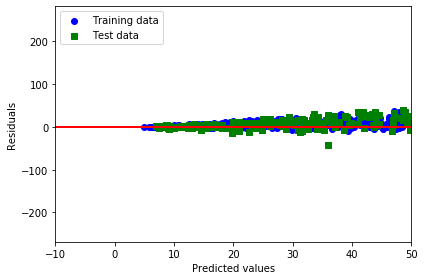

In [6]:
# random forest regressor
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('[random forest regression]')
print('MSE train: %.2f, test: %.2f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()